# Prerequisites

## Install Library

In [3]:
# for python 3.12.3
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [48]:
## Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import datetime as dt
from tqdm import tqdm
import optuna
from scipy.stats import randint, uniform
from skopt import BayesSearchCV
from scipy.stats import skew, normaltest, zscore
from geopy.distance import geodesic
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV, ParameterSampler, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay, average_precision_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import json
import joblib
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [ ]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTrain_cleaned.csv", index_col=0)

In [6]:
# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [7]:
df.head()

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,514,4.97,Jennifer,Banks,0,561 Perry Cove,526,27,...,0,0,0,1,0,0,0,0,0,78.773821
1,2019-01-01 00:00:44,630423337322,241,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,612,47,...,0,0,0,0,0,0,0,0,0,30.216618
2,2019-01-01 00:00:51,38859492057661,390,220.11,Edward,Sanchez,1,594 White Dale Suite 530,468,13,...,0,0,0,0,0,0,0,0,0,108.102912
3,2019-01-01 00:01:16,3534093764340240,360,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,84,26,...,0,0,0,0,0,0,0,0,0,95.685115
4,2019-01-01 00:03:06,375534208663984,297,41.96,Tyler,Garcia,1,408 Bradley Rest,216,45,...,0,0,0,0,1,0,0,0,0,77.702395


In [8]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'hour', 'day', 'month', 'year', 'is_weekend',
       'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes',
       'diff_seconds', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance'],
      dtype='object')

In [9]:
df.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                            int64
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                                int64
state                               int64
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int64
dob                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
age                                 int64
hour                                int64
day                               

In [10]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
hour                       0
day                        0
month                      0
year                       0
is_weekend                 0
is_weekday                 0
time_diff                  0
diff_days                  0
diff_hours                 0
diff_minutes               0
diff_seconds               0
category_entertainment     0
category_food_

In [11]:
df_all = df.copy()

# Time-based split
split_time = df_all['trans_date_trans_time'].quantile(0.8)
df_train = df_all[df_all['trans_date_trans_time'] < split_time]
df_test = df_all[df_all['trans_date_trans_time'] >= split_time]

split_time_val = df_train['trans_date_trans_time'].quantile(0.8)
df_train_final = df_train[df_train['trans_date_trans_time'] < split_time_val]
df_val = df_train[df_train['trans_date_trans_time'] >= split_time_val]

In [12]:
df_train_final.shape, df_val.shape, df_test.shape

((829872, 48), (207468, 48), (259335, 48))

# Model Pipeline

## 1. Features

### 1.1 Split Features and Target

In [13]:
columns_to_exclude = ['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num']

# Train
X_train = df_train_final.drop(columns_to_exclude, axis=1)
y_train = df_train_final["is_fraud"]

# Validation
X_val = df_val.drop(columns_to_exclude, axis=1)
y_val = df_val["is_fraud"]

# Test
X_test = df_test.drop(columns_to_exclude, axis=1)
y_test = df_test["is_fraud"]

### 1.2 Feature Scaling

In [14]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### 1.3 Feature Selection

In [15]:
# 1st: Select K Best (Find the 10 best features)
# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

Result from SelectKBest

In [16]:
# List the selected features from SelectKBest
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['amt', 'is_fraud', 'time_diff', 'diff_hours', 'diff_seconds',
       'category_food_dining', 'category_grocery_pos', 'category_home',
       'category_misc_net', 'category_shopping_net'],
      dtype='object')


In [17]:
# 2nd: PCA (Dimensionality Reduction)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_selected)
X_val_pca = pca.transform(X_val_selected)
X_test_pca = pca.transform(X_test_selected)

In [18]:
# Define the model pipeline
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=10)),
    ('pca', PCA(n_components=5)),
    ('isolation_forest', IsolationForest(random_state=42))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('select_kbest', SelectKBest()),
                ('pca', PCA(n_components=5)),
                ('isolation_forest', IsolationForest(random_state=42))])

## 2. Isolation Forest

### 2.1 Find Best Parameters

#### Bayesian Optimization with Optuna

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_samples = trial.suggest_categorical('max_samples', ['auto', 0.8])
    contamination = trial.suggest_float('contamination', 0.001, 0.05)
    max_features = trial.suggest_categorical('max_features', [1.0, 0.8])

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('select_kbest', SelectKBest(score_func=f_classif, k=10)),
        ('pca', PCA(n_components=5)),
        ('isolation_forest', IsolationForest(
            n_estimators=n_estimators,
            max_samples=max_samples,
            contamination=contamination,
            max_features=max_features,
            random_state=42
        ))
    ])

    # Train on train set
    pipeline.fit(X_train, y_train)
    # Predict on validation set
    y_pred = pipeline.predict(X_val)
    # IsolationForest: -1 = anomaly, 1 = normal
    y_pred_bin = (y_pred == -1).astype(int)

    print("y_val unique:", np.unique(y_val))
    print("y_pred_bin unique:", np.unique(y_pred_bin))

     # Calculate metrics
    f1 = f1_score(y_val, y_pred_bin, average='binary')
    recall = recall_score(y_val, y_pred_bin, average='binary')
    precision = precision_score(y_val, y_pred_bin, average='binary')
    pr_auc = average_precision_score(y_val, y_pred_bin)
    kappa = cohen_kappa_score(y_val, y_pred_bin)

    # Log metrics to Optuna
    trial.set_user_attr("recall", recall)
    trial.set_user_attr("precision", precision)
    trial.set_user_attr("pr_auc", pr_auc)
    trial.set_user_attr("kappa", kappa)

    # Print metrics (optional)
    print(f"F1: {f1:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, PR-AUC: {pr_auc:.3f}, Kappa: {kappa:.3f}")
    
    # Return f1 score
    return f1_score(y_val, y_pred_bin, average='binary')

In [28]:
# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best params from Optuna:", study.best_params)

[I 2025-07-06 09:51:38,222] A new study created in memory with name: no-name-6ae0b37a-25f8-41c0-b312-f18e3d9ef08e


y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.217, Recall: 1.000, Precision: 0.122, PR-AUC: 0.122, Kappa: 0.210


[I 2025-07-06 09:53:31,851] Trial 0 finished with value: 0.21747608877333086 and parameters: {'n_estimators': 300, 'max_samples': 0.8, 'contamination': 0.04406098715066176, 'max_features': 1.0}. Best is trial 0 with value: 0.21747608877333086.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 09:53:44,970] Trial 1 finished with value: 0.7531461761858664 and parameters: {'n_estimators': 139, 'max_samples': 'auto', 'contamination': 0.009102493611393491, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.753, Recall: 0.997, Precision: 0.605, PR-AUC: 0.603, Kappa: 0.751
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 09:53:56,471] Trial 2 finished with value: 0.5433874709976798 and parameters: {'n_estimators': 127, 'max_samples': 'auto', 'contamination': 0.014617557324742094, 'max_features': 1.0}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.543, Recall: 1.000, Precision: 0.373, PR-AUC: 0.373, Kappa: 0.540
y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.343, Recall: 0.787, Precision: 0.219, PR-AUC: 0.173, Kappa: 0.337


[I 2025-07-06 09:54:59,697] Trial 3 finished with value: 0.34263392857142855 and parameters: {'n_estimators': 163, 'max_samples': 0.8, 'contamination': 0.01864517895581237, 'max_features': 1.0}. Best is trial 1 with value: 0.7531461761858664.


y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.227, Recall: 0.168, Precision: 0.348, PR-AUC: 0.063, Kappa: 0.224


[I 2025-07-06 09:56:39,615] Trial 4 finished with value: 0.2268278641335636 and parameters: {'n_estimators': 264, 'max_samples': 0.8, 'contamination': 0.0021410453535901466, 'max_features': 1.0}. Best is trial 1 with value: 0.7531461761858664.


y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.201, Recall: 1.000, Precision: 0.112, PR-AUC: 0.112, Kappa: 0.192


[I 2025-07-06 09:57:47,955] Trial 5 finished with value: 0.20066832319424213 and parameters: {'n_estimators': 176, 'max_samples': 0.8, 'contamination': 0.04853614230992086, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 09:57:59,679] Trial 6 finished with value: 0.5390103567318757 and parameters: {'n_estimators': 107, 'max_samples': 'auto', 'contamination': 0.014809012997646726, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.539, Recall: 1.000, Precision: 0.369, PR-AUC: 0.369, Kappa: 0.535
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 09:58:11,030] Trial 7 finished with value: 0.3690807799442897 and parameters: {'n_estimators': 102, 'max_samples': 'auto', 'contamination': 0.0011984688582353366, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.369, Recall: 0.226, Precision: 1.000, PR-AUC: 0.231, Kappa: 0.368
y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.392, Recall: 0.471, Precision: 0.335, PR-AUC: 0.161, Kappa: 0.388


[I 2025-07-06 09:59:38,714] Trial 8 finished with value: 0.39161336176261546 and parameters: {'n_estimators': 230, 'max_samples': 0.8, 'contamination': 0.00660051898855619, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 09:59:50,719] Trial 9 finished with value: 0.25758908930928287 and parameters: {'n_estimators': 133, 'max_samples': 'auto', 'contamination': 0.037678092604514296, 'max_features': 1.0}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.258, Recall: 1.000, Precision: 0.148, PR-AUC: 0.148, Kappa: 0.250
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:00:08,091] Trial 10 finished with value: 0.325730180806676 and parameters: {'n_estimators': 208, 'max_samples': 'auto', 'contamination': 0.028421431904777413, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.326, Recall: 1.000, Precision: 0.195, PR-AUC: 0.195, Kappa: 0.319
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:00:20,925] Trial 11 finished with value: 0.5609580838323354 and parameters: {'n_estimators': 146, 'max_samples': 'auto', 'contamination': 0.014072378527933917, 'max_features': 1.0}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.561, Recall: 1.000, Precision: 0.390, PR-AUC: 0.390, Kappa: 0.557
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:00:35,910] Trial 12 finished with value: 0.35207456404088994 and parameters: {'n_estimators': 160, 'max_samples': 'auto', 'contamination': 0.025658413908890326, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.352, Recall: 1.000, Precision: 0.214, PR-AUC: 0.214, Kappa: 0.346
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:00:48,215] Trial 13 finished with value: 0.7271033840422229 and parameters: {'n_estimators': 143, 'max_samples': 'auto', 'contamination': 0.009703462400299335, 'max_features': 1.0}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.727, Recall: 1.000, Precision: 0.571, PR-AUC: 0.571, Kappa: 0.725
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:01:04,997] Trial 14 finished with value: 0.7370744010088273 and parameters: {'n_estimators': 196, 'max_samples': 'auto', 'contamination': 0.009437805025769387, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.737, Recall: 0.998, Precision: 0.584, PR-AUC: 0.583, Kappa: 0.735
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:01:24,027] Trial 15 finished with value: 0.40922593045605454 and parameters: {'n_estimators': 214, 'max_samples': 'auto', 'contamination': 0.021461825720121515, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.409, Recall: 1.000, Precision: 0.257, PR-AUC: 0.257, Kappa: 0.404
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:01:40,664] Trial 16 finished with value: 0.3033678756476684 and parameters: {'n_estimators': 190, 'max_samples': 'auto', 'contamination': 0.031237594501108416, 'max_features': 0.8}. Best is trial 1 with value: 0.7531461761858664.


F1: 0.303, Recall: 1.000, Precision: 0.179, PR-AUC: 0.179, Kappa: 0.297
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:02:00,461] Trial 17 finished with value: 0.7695852534562212 and parameters: {'n_estimators': 243, 'max_samples': 'auto', 'contamination': 0.008775778833936838, 'max_features': 0.8}. Best is trial 17 with value: 0.7695852534562212.


F1: 0.770, Recall: 0.998, Precision: 0.626, PR-AUC: 0.625, Kappa: 0.768
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:02:21,121] Trial 18 finished with value: 0.4227436823104693 and parameters: {'n_estimators': 248, 'max_samples': 'auto', 'contamination': 0.02054922604803562, 'max_features': 0.8}. Best is trial 17 with value: 0.7695852534562212.


F1: 0.423, Recall: 1.000, Precision: 0.268, PR-AUC: 0.268, Kappa: 0.418
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:02:43,023] Trial 19 finished with value: 0.8243757934828607 and parameters: {'n_estimators': 272, 'max_samples': 'auto', 'contamination': 0.005627303369906337, 'max_features': 0.8}. Best is trial 19 with value: 0.8243757934828607.


F1: 0.824, Recall: 0.832, Precision: 0.817, PR-AUC: 0.681, Kappa: 0.823
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:03:05,432] Trial 20 finished with value: 0.8289855072463769 and parameters: {'n_estimators': 284, 'max_samples': 'auto', 'contamination': 0.005878427403175337, 'max_features': 0.8}. Best is trial 20 with value: 0.8289855072463769.


F1: 0.829, Recall: 0.855, Precision: 0.805, PR-AUC: 0.689, Kappa: 0.828
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:03:29,676] Trial 21 finished with value: 0.707040866568193 and parameters: {'n_estimators': 286, 'max_samples': 'auto', 'contamination': 0.0039161556491750325, 'max_features': 0.8}. Best is trial 20 with value: 0.8289855072463769.


F1: 0.707, Recall: 0.613, Precision: 0.835, PR-AUC: 0.514, Kappa: 0.706
y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.840, Recall: 0.904, Precision: 0.785, PR-AUC: 0.710, Kappa: 0.839


[I 2025-07-06 10:03:50,901] Trial 22 finished with value: 0.8403494837172358 and parameters: {'n_estimators': 257, 'max_samples': 'auto', 'contamination': 0.0063208478530821285, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:04:13,145] Trial 23 finished with value: 0.8194622279129321 and parameters: {'n_estimators': 270, 'max_samples': 'auto', 'contamination': 0.005546375598257097, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.819, Recall: 0.820, Precision: 0.819, PR-AUC: 0.673, Kappa: 0.818
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:04:34,650] Trial 24 finished with value: 0.5765632693254554 and parameters: {'n_estimators': 263, 'max_samples': 'auto', 'contamination': 0.013559274741876973, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.577, Recall: 1.000, Precision: 0.405, PR-AUC: 0.405, Kappa: 0.573
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:04:57,057] Trial 25 finished with value: 0.8213193534294451 and parameters: {'n_estimators': 280, 'max_samples': 'auto', 'contamination': 0.005299283226755299, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.821, Recall: 0.803, Precision: 0.841, PR-AUC: 0.676, Kappa: 0.820
y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.348, Recall: 0.776, Precision: 0.224, PR-AUC: 0.175, Kappa: 0.342


[I 2025-07-06 10:06:49,006] Trial 26 finished with value: 0.34820915533422714 and parameters: {'n_estimators': 294, 'max_samples': 0.8, 'contamination': 0.017909444449009767, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:07:10,387] Trial 27 finished with value: 0.6217148924873905 and parameters: {'n_estimators': 245, 'max_samples': 'auto', 'contamination': 0.012183792857325551, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.622, Recall: 1.000, Precision: 0.451, PR-AUC: 0.451, Kappa: 0.619
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:07:32,360] Trial 28 finished with value: 0.2752379833117875 and parameters: {'n_estimators': 276, 'max_samples': 'auto', 'contamination': 0.03506722557082772, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.275, Recall: 1.000, Precision: 0.160, PR-AUC: 0.160, Kappa: 0.268
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:09:26,126] Trial 29 finished with value: 0.3078585765014667 and parameters: {'n_estimators': 298, 'max_samples': 0.8, 'contamination': 0.02392667838140136, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.308, Recall: 0.851, Precision: 0.188, PR-AUC: 0.161, Kappa: 0.301
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:09:44,638] Trial 30 finished with value: 0.2334064181781941 and parameters: {'n_estimators': 227, 'max_samples': 'auto', 'contamination': 0.04229552016827242, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.233, Recall: 1.000, Precision: 0.132, PR-AUC: 0.132, Kappa: 0.226
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:10:06,055] Trial 31 finished with value: 0.7781851512373968 and parameters: {'n_estimators': 280, 'max_samples': 'auto', 'contamination': 0.004908108259423766, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.778, Recall: 0.725, Precision: 0.840, PR-AUC: 0.610, Kappa: 0.777
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:10:26,722] Trial 32 finished with value: 0.3316725978647687 and parameters: {'n_estimators': 259, 'max_samples': 'auto', 'contamination': 0.0011579290304221546, 'max_features': 0.8}. Best is trial 22 with value: 0.8403494837172358.


F1: 0.332, Recall: 0.199, Precision: 0.996, PR-AUC: 0.203, Kappa: 0.330
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:10:48,705] Trial 33 finished with value: 0.8448150833937635 and parameters: {'n_estimators': 286, 'max_samples': 'auto', 'contamination': 0.007540881258086388, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.845, Recall: 0.995, Precision: 0.734, PR-AUC: 0.730, Kappa: 0.844
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:11:12,679] Trial 34 finished with value: 0.8053830227743273 and parameters: {'n_estimators': 300, 'max_samples': 'auto', 'contamination': 0.008111973438068097, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.805, Recall: 0.997, Precision: 0.676, PR-AUC: 0.673, Kappa: 0.804
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:11:33,755] Trial 35 finished with value: 0.6878120411160059 and parameters: {'n_estimators': 290, 'max_samples': 'auto', 'contamination': 0.010452679968389222, 'max_features': 1.0}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.688, Recall: 1.000, Precision: 0.524, PR-AUC: 0.524, Kappa: 0.685
y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.421, Recall: 0.697, Precision: 0.301, PR-AUC: 0.212, Kappa: 0.416


[I 2025-07-06 10:13:08,188] Trial 36 finished with value: 0.4207269914926527 and parameters: {'n_estimators': 253, 'max_samples': 0.8, 'contamination': 0.011637338917108686, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:13:26,811] Trial 37 finished with value: 0.7115484205075091 and parameters: {'n_estimators': 233, 'max_samples': 'auto', 'contamination': 0.003564301300655222, 'max_features': 1.0}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.712, Recall: 0.587, Precision: 0.904, PR-AUC: 0.533, Kappa: 0.710
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:13:47,930] Trial 38 finished with value: 0.48771345272803 and parameters: {'n_estimators': 270, 'max_samples': 'auto', 'contamination': 0.017099475711579423, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.488, Recall: 1.000, Precision: 0.323, PR-AUC: 0.323, Kappa: 0.483
y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.392, Recall: 0.496, Precision: 0.325, PR-AUC: 0.164, Kappa: 0.388


[I 2025-07-06 10:15:35,582] Trial 39 finished with value: 0.392434988179669 and parameters: {'n_estimators': 285, 'max_samples': 0.8, 'contamination': 0.007177997524004346, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:15:57,315] Trial 40 finished with value: 0.524641577060932 and parameters: {'n_estimators': 271, 'max_samples': 'auto', 'contamination': 0.015529682970265867, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.525, Recall: 1.000, Precision: 0.356, PR-AUC: 0.356, Kappa: 0.521
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:16:19,272] Trial 41 finished with value: 0.8257736328952946 and parameters: {'n_estimators': 278, 'max_samples': 'auto', 'contamination': 0.005616346262903058, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.826, Recall: 0.832, Precision: 0.820, PR-AUC: 0.683, Kappa: 0.825
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:16:40,301] Trial 42 finished with value: 0.6380789022298456 and parameters: {'n_estimators': 258, 'max_samples': 'auto', 'contamination': 0.0027238431174957823, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.638, Recall: 0.477, Precision: 0.965, PR-AUC: 0.463, Kappa: 0.637
y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.841, Recall: 0.890, Precision: 0.797, PR-AUC: 0.710, Kappa: 0.840


[I 2025-07-06 10:17:02,411] Trial 43 finished with value: 0.841000807102502 and parameters: {'n_estimators': 288, 'max_samples': 'auto', 'contamination': 0.006213256508122541, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:17:24,719] Trial 44 finished with value: 0.8315488936473948 and parameters: {'n_estimators': 289, 'max_samples': 'auto', 'contamination': 0.007706298021520329, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.832, Recall: 0.995, Precision: 0.714, PR-AUC: 0.711, Kappa: 0.830
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:17:45,678] Trial 45 finished with value: 0.6460689655172414 and parameters: {'n_estimators': 290, 'max_samples': 'auto', 'contamination': 0.011414845932874012, 'max_features': 1.0}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.646, Recall: 1.000, Precision: 0.477, PR-AUC: 0.477, Kappa: 0.643
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:18:09,355] Trial 46 finished with value: 0.8306595365418894 and parameters: {'n_estimators': 299, 'max_samples': 'auto', 'contamination': 0.007731449580311238, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.831, Recall: 0.995, Precision: 0.713, PR-AUC: 0.709, Kappa: 0.830
y_val unique: [0 1]
y_pred_bin unique: [0 1]
F1: 0.413, Recall: 0.570, Precision: 0.324, PR-AUC: 0.187, Kappa: 0.409


[I 2025-07-06 10:20:01,912] Trial 47 finished with value: 0.41298299845440495 and parameters: {'n_estimators': 298, 'max_samples': 0.8, 'contamination': 0.00847791134122219, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:20:23,156] Trial 48 finished with value: 0.5293851717902351 and parameters: {'n_estimators': 291, 'max_samples': 'auto', 'contamination': 0.01517913081757033, 'max_features': 1.0}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.529, Recall: 1.000, Precision: 0.360, PR-AUC: 0.360, Kappa: 0.525
y_val unique: [0 1]
y_pred_bin unique: [0 1]


[I 2025-07-06 10:20:44,067] Trial 49 finished with value: 0.6070502851218248 and parameters: {'n_estimators': 265, 'max_samples': 'auto', 'contamination': 0.012576299942233887, 'max_features': 0.8}. Best is trial 33 with value: 0.8448150833937635.


F1: 0.607, Recall: 1.000, Precision: 0.436, PR-AUC: 0.436, Kappa: 0.604
Best params from Optuna: {'n_estimators': 286, 'max_samples': 'auto', 'contamination': 0.007540881258086388, 'max_features': 0.8}


In [30]:
# สร้าง pipeline ด้วย best params และ train บน train+val
best_params = study.best_params
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=10)),
    ('pca', PCA(n_components=5)),
    ('isolation_forest', IsolationForest(
        n_estimators=best_params['n_estimators'],
        max_samples=best_params['max_samples'],
        contamination=best_params['contamination'],
        max_features=best_params['max_features'],
        random_state=42
    ))
])

In [31]:
X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)
best_pipeline.fit(X_trainval, y_trainval)

Pipeline(steps=[('scaler', StandardScaler()), ('select_kbest', SelectKBest()),
                ('pca', PCA(n_components=5)),
                ('isolation_forest',
                 IsolationForest(contamination=0.007540881258086388,
                                 max_features=0.8, n_estimators=286,
                                 random_state=42))])

In [73]:
# --- Display Optuna Results ---
print("Best Optuna Parameters:", best_params)
print("Best Optuna F1 Score:", study.best_value)
print("Best Optuna ROC AUC:", roc_auc_score(y_test, y_pred))

Best Optuna Parameters: {'n_estimators': 286, 'max_samples': 'auto', 'contamination': 0.007540881258086388, 'max_features': 0.8}
Best Optuna F1 Score: 0.8448150833937635
Best Optuna ROC AUC: 0.9713601040400872


### 2.2 Evaluate and Compare The Results

Classification Report

In [32]:
# Evaluate on test set
y_pred = best_pipeline.predict(X_test)
y_pred = (y_pred == -1).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257797
           1       0.74      0.94      0.83      1538

    accuracy                           1.00    259335
   macro avg       0.87      0.97      0.91    259335
weighted avg       1.00      1.00      1.00    259335



Confusion Matrix

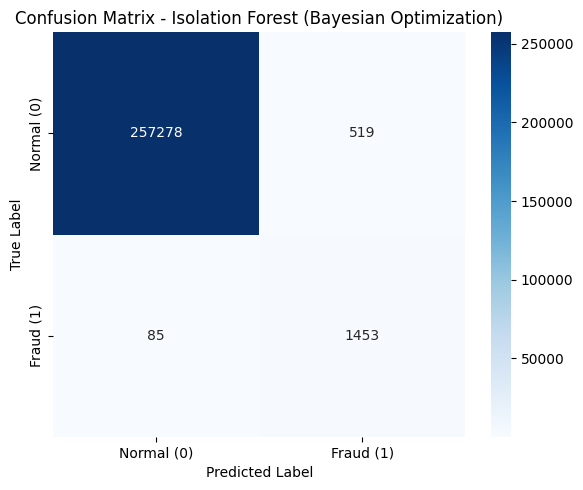

In [35]:
# Predicted values and true values for confusion matrix for Optuna (Bayesian Optimization)
y_true = y_test
y_pred_optuna = (best_pipeline.predict(X_test) == -1).astype(int)

# Build confusion matrix
cm_optuna = confusion_matrix(y_true, y_pred_optuna)
labels = ['Normal (0)', 'Fraud (1)']

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_optuna, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix - Isolation Forest (Bayesian Optimization)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [71]:
metrics = {
    "Method": ["Optuna"],
    "Precision": [
        precision_score(y_test, y_pred_optuna)
    ],
    "Recall": [
        recall_score(y_test, y_pred_optuna)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_optuna)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_pred_optuna)
    ],
    "Cohen Kappa": [
        cohen_kappa_score(y_test, y_pred_optuna)
    ]
}

df_metrics = pd.DataFrame(metrics)
display(df_metrics)

,Method,Precision,Recall,F1-Score,ROC-AUC,Cohen Kappa
0,Optuna,0.736815,0.944733,0.82792,0.97136,0.826766


ROC Curve

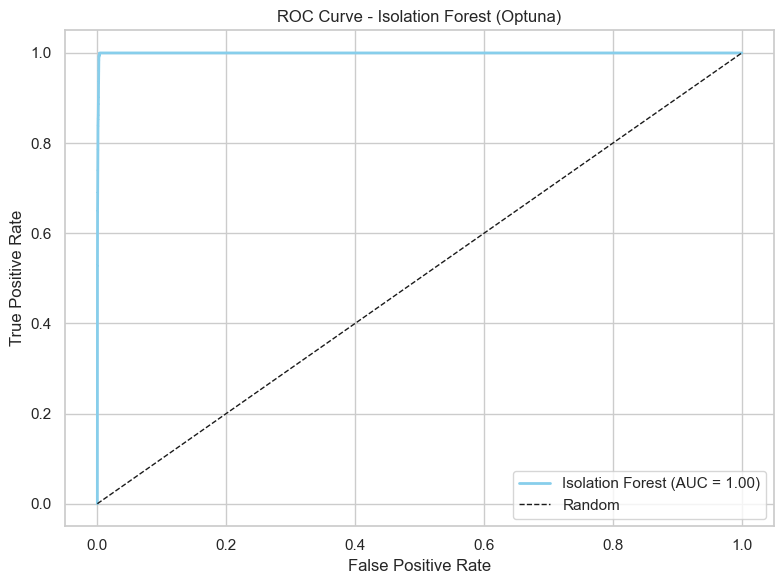

In [47]:
# --- Display ROC Curve ---
y_score = best_pipeline.decision_function(X_test)

# Build ROC curve
fpr, tpr, thresholds = roc_curve(y_test, -y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'Isolation Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Isolation Forest (Optuna)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Precision-Recall Curve

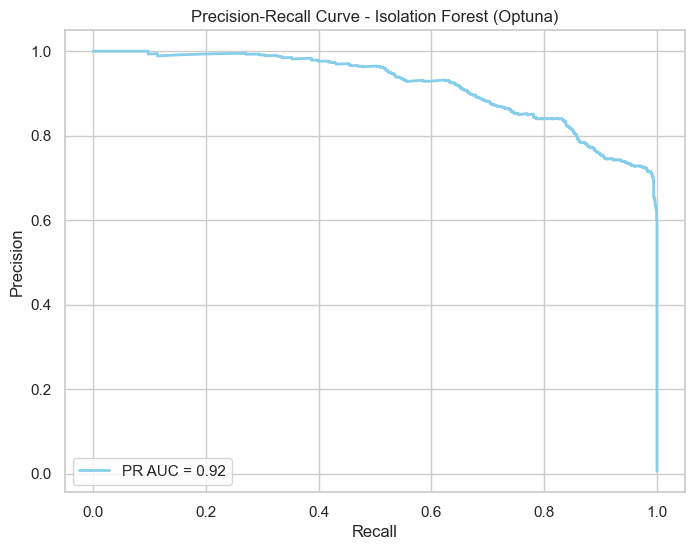

In [49]:
# --- Display Precision-Recall Curve ---
y_score = best_pipeline.decision_function(X_test)

# สร้าง Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, -y_score)
pr_auc = average_precision_score(y_test, -y_score)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='skyblue', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Isolation Forest (Optuna)')
plt.legend(loc='lower left')
plt.grid(True)

Metrics Comparison

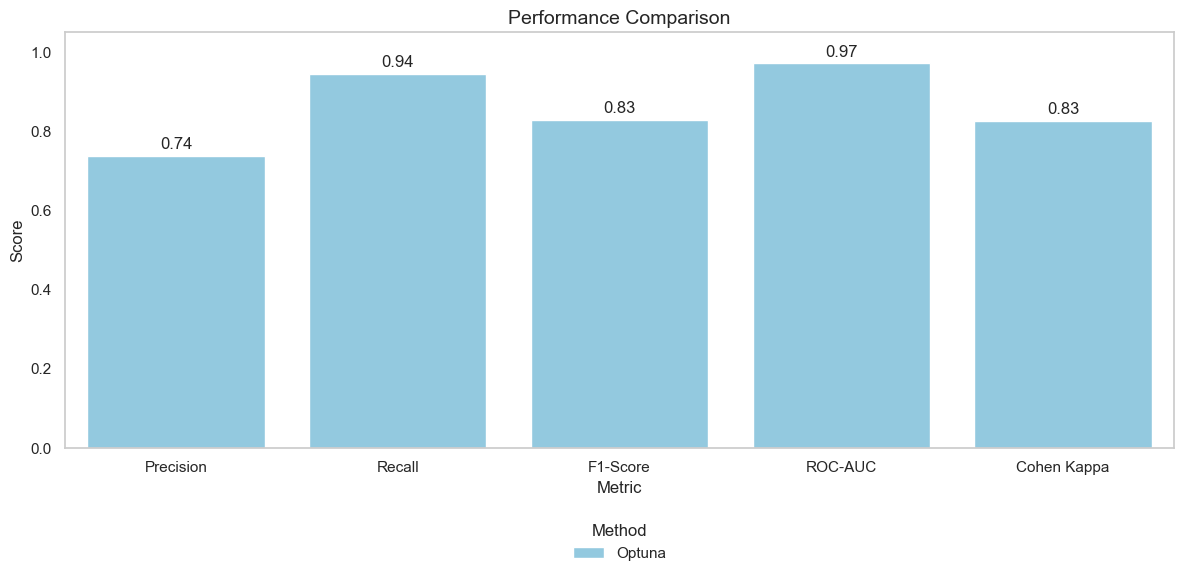

In [72]:
# --- Display Metrics Comparison ---
plt.figure(figsize=(12, 6))

df_melt = df_metrics.melt(id_vars="Method", var_name="Metric", value_name="Score")
ax = sns.barplot(data=df_melt, x="Metric", y="Score", hue="Method", palette=["skyblue"])

# Annotate the bars with their values
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )

plt.title("Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(
    title="Method",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.tight_layout()
plt.grid(False)
plt.show()

Overfitting Plot

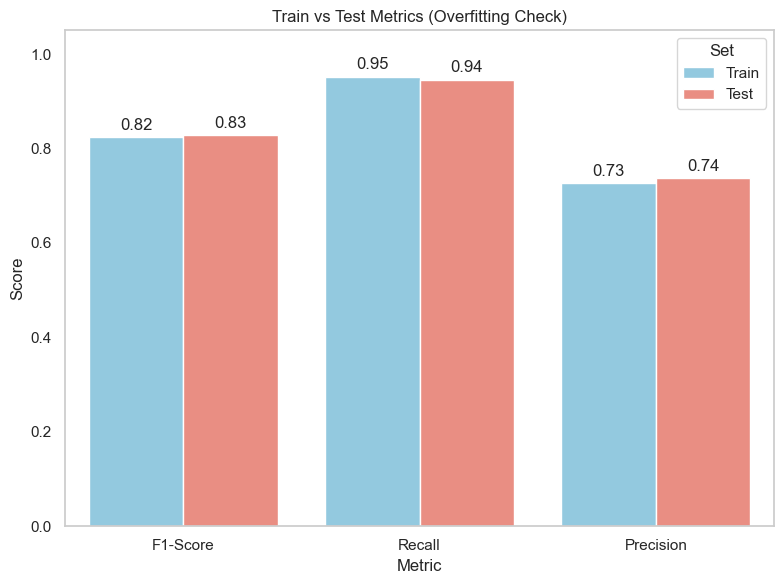

In [75]:
# --- Calculate metrics for train set ---
y_pred_train = (best_pipeline.predict(X_trainval) == -1).astype(int)
train_f1 = f1_score(y_trainval, y_pred_train)
train_recall = recall_score(y_trainval, y_pred_train)
train_precision = precision_score(y_trainval, y_pred_train)

# --- Calculate metrics for test set ---
y_pred_test = (best_pipeline.predict(X_test) == -1).astype(int)
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)

# --- Prepare DataFrame for plotting ---
df_overfit = pd.DataFrame({
    "Metric": ["F1-Score", "Recall", "Precision"],
    "Train": [train_f1, train_recall, train_precision],
    "Test": [test_f1, test_recall, test_precision]
})

df_overfit = df_overfit.melt(id_vars="Metric", var_name="Set", value_name="Score")

# --- Plot ---
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_overfit, x="Metric", y="Score", hue="Set", palette=["skyblue", "salmon"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )
plt.title("Train vs Test Metrics (Overfitting Check)")
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.tight_layout()
plt.grid(False)
plt.show()

### 2.3 Save Model

In [50]:
# 1. Save full pipeline with all preprocessing steps
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=10)),
    ('pca', PCA(n_components=5)),
    ('isolation_forest', IsolationForest(**best_params, random_state=42))
])

# Prepare data for fitting
X = df_train.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'dob', 'is_fraud'], axis=1)
y = df_train['is_fraud']

# Fit and save pipeline
full_pipeline.fit(X, y)
joblib.dump(full_pipeline, "full_pipeline_isolation_forest.joblib")

# 2. Save best parameters
with open("params_IsolationForest_fromOptuna.json", "w") as f:
    json.dump(best_params, f)

# 3. Save model with parameters
save_dict = {
    "pipeline": full_pipeline,
    "params": best_params
}
joblib.dump(save_dict, "IsolationForest_with_params.joblib")

['IsolationForest_with_params.joblib']

# Model Testing

In [54]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTest_cleaned.csv", index_col=0)
loaded_pipeline = joblib.load("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/AnomalyDetection/full_pipeline_isolation_forest.joblib")

In [57]:
# Random sample for testing
# sample_df = df.sample(n=50, random_state=42).copy()
sample_df = df.sample(100).copy()
X_sample = sample_df.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'dob', 'is_fraud'], axis=1)

In [68]:
predictions = loaded_pipeline.predict(X_sample)
predicted_result = (predictions == -1).astype(int) # 1 = fraud, 0 = normal

In [70]:
# Calculate fraud probability (normalize anomaly score to 0-1)
anomaly_score = loaded_pipeline.decision_function(X_sample)
fraud_probability = (anomaly_score.max() - anomaly_score) / (anomaly_score.max() - anomaly_score.min())

# Add predictions and fraud probability to sample_df
sample_df['predicted_result'] = predicted_result
sample_df['fraud_probability'] = fraud_probability

# Select columns to display
columns_to_show = [
    'trans_date_trans_time', 'trans_num', 'cc_num',  'first', 'last', 'merchant', 'amt',
    'is_fraud', 'predicted_result', 'fraud_probability'
]
display(sample_df[columns_to_show].reset_index(drop=True))

,trans_date_trans_time,trans_num,cc_num,first,last,merchant,amt,is_fraud,predicted_result,fraud_probability
0,2020-12-05 20:52:33,77ce4befdc50ac2e2784f27c7080a55a,3538520143479972,Cassandra,Nunez,15,4.39,0,0,0.646545
1,2020-07-14 18:02:37,9c5128b9bf3f2261243e96c591ce60b3,3565423334076143,Nathan,Thomas,455,171.79,0,0,0.213439
2,2020-12-11 03:01:27,36c1ada0e02efac9950960dad8953251,371284424780634,Jeremy,Moore,534,110.38,0,0,0.084545
3,2020-08-18 04:40:17,790839164fb8e8a99f315c17ab0e84a6,6528911529051375,Diane,Smith,20,111.82,0,0,0.476328
4,2020-06-30 15:40:56,fd51fc06b70e8c1fddd6e4c54d6d90ee,343464013864032,Jodi,Foster,667,153.27,0,0,0.203193
...,...,...,...,...,...,...,...,...,...,...
95,2020-10-09 14:51:39,5a33b43f16bc1737775979146b9c8359,372509258176510,Kristen,Hanson,540,10.04,0,0,0.663250
96,2020-07-28 13:28:25,bf505e529f73bb1d4904d4941f5900cd,3589255887819806,David,Miller,132,77.29,0,0,0.546352
97,2020-06-24 01:15:42,28ca69ab61e48441f28dbb31a22dc355,3552581383553463,Jonathan,Castro,133,7.06,0,0,0.049093
98,2020-09-07 12:05:41,ef35e5492be49804c6de7cd966d38247,3541160328600277,Jason,Singh,581,36.81,0,0,0.614996
